## Imporing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from keras import models
from keras.models import Sequential
from keras.layers import Dense, Activation
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm

Using TensorFlow backend.


## Opening the new voices dataframe.
### These voices were downloaded from 'Open Speech and Language Resources' and then processed in the "Audio processing - New Voices" notebook

http://www.openslr.org/45/

In [2]:
voices_new = pd.read_csv('..//datasets//new_voices.csv')

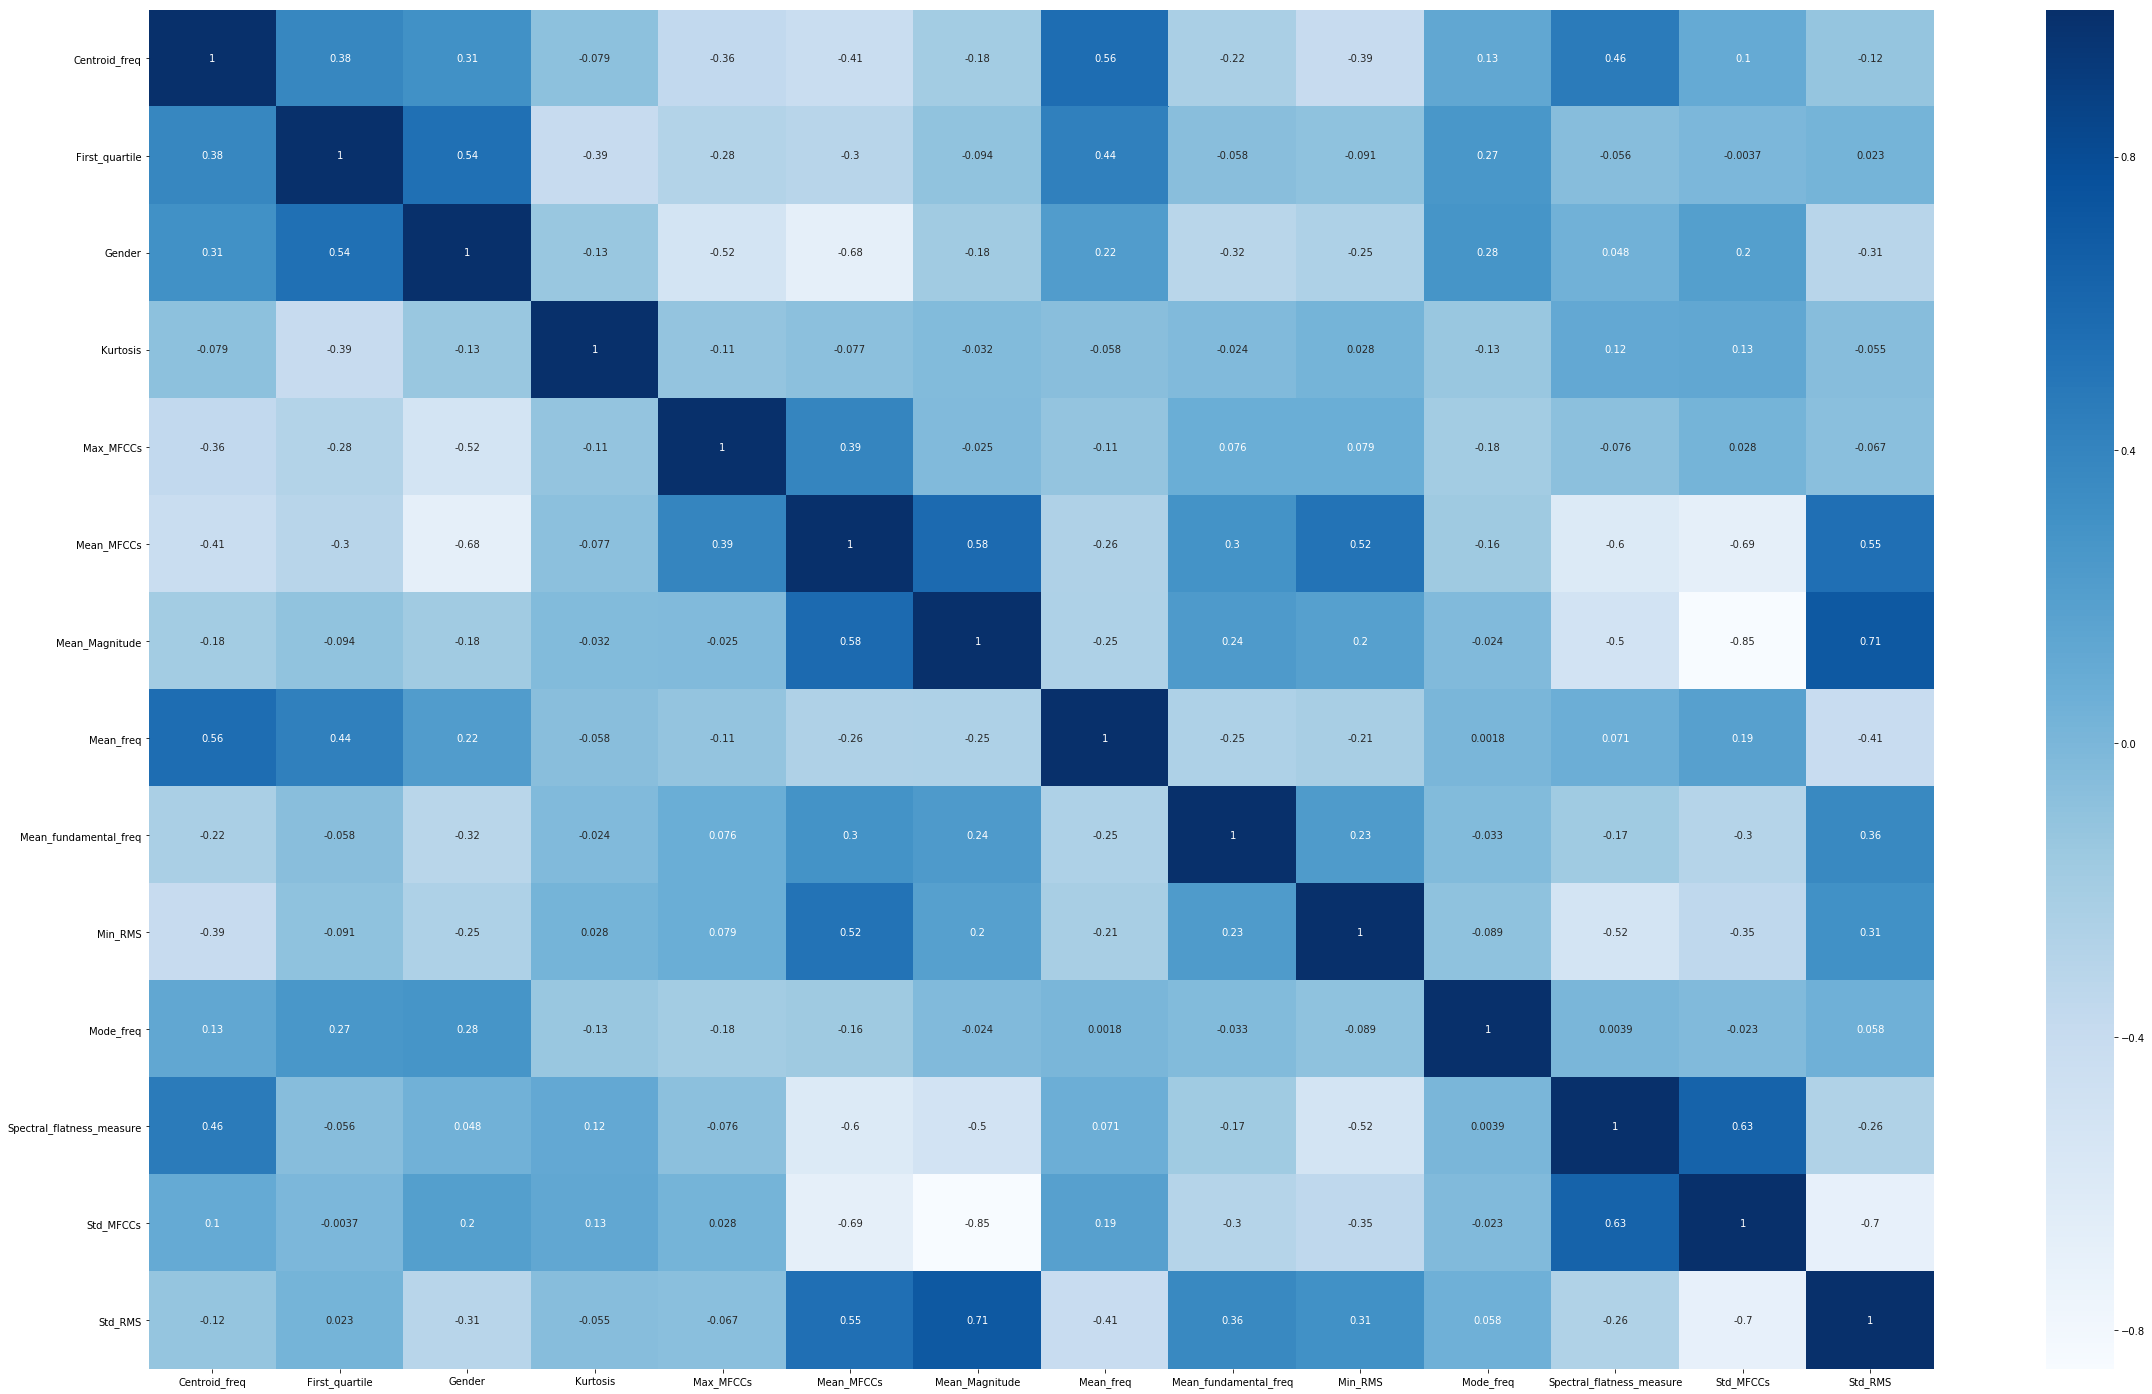

In [3]:
corr_matrix = voices_new.corr()
f, ax = plt.subplots(figsize=(40, 25))
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.show()

## To know and plot the highly correlated features with the gender.

In [4]:
voices_new_columns = list(voices_new.columns)
voices_new_columns.remove('Gender')

for i in voices_new_columns:
    if voices_new['Gender'].corr(voices_new[i]) >= 0.4 or voices_new['Gender'].corr(voices_new[i]) <= - 0.4:
        print(i)
        print('The correlation is: ' + str(voices_new['Gender'].corr(voices_new[i])))

First_quartile
The correlation is: 0.5375654947812712
Max_MFCCs
The correlation is: -0.5192932417732128
Mean_MFCCs
The correlation is: -0.6826411722916911


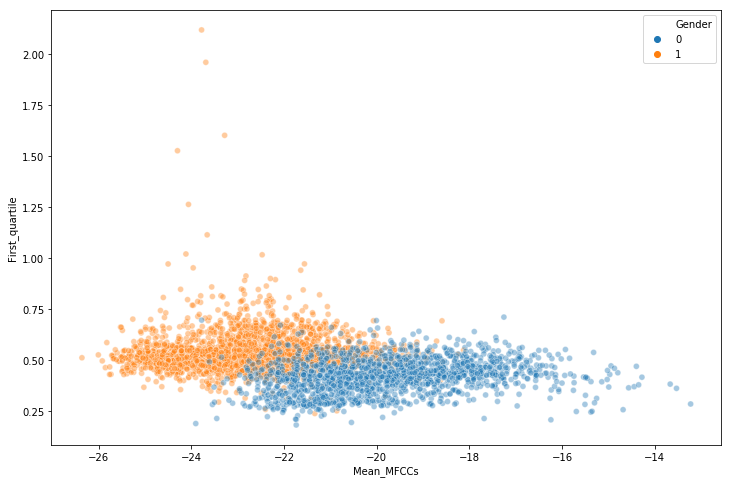

In [5]:
plt.subplots(figsize=(12, 8))
ax = sns.scatterplot(x="Mean_MFCCs", y="First_quartile", hue="Gender", alpha=0.4, data=voices_new)
plt.show(ax)

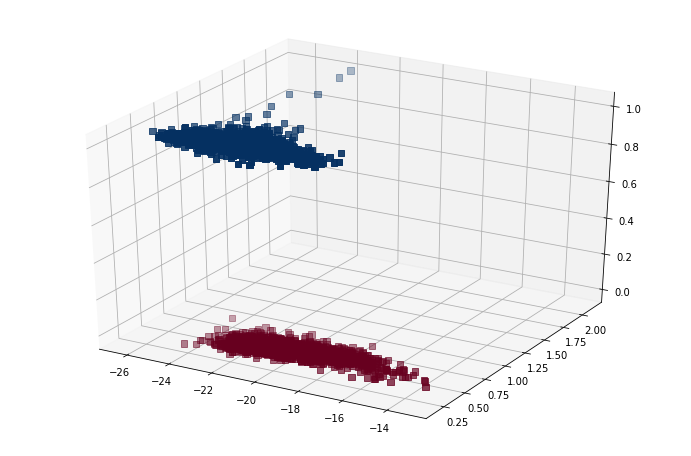

In [6]:
fig = plt.figure(figsize = (12,8))
ax = fig.add_subplot(111, projection='3d')
x = np.array(voices_new["Mean_MFCCs"])
y = np.array(voices_new["First_quartile"])
z = np.array(voices_new["Gender"])

ax.scatter(x,y,z, marker="s", c=voices_new["Gender"], s=40, cmap="RdBu")

plt.show()

## Splitting the dataframe into inputs and output and then to 80% 20% split to train and test using different models.

In [7]:
y_new = pd.DataFrame(voices_new['Gender'])
X_new = voices_new.drop(columns=['Gender']).copy()

In [8]:
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X_new, y_new, test_size=0.2)

## Training and checking the accuracy using Random Forest Regressor (RFR)

In [9]:
voices_new_rfr = RandomForestRegressor(max_depth=13).fit(X_new_train, y_new_train)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [10]:
voices_new_rfr_y_pred_train = voices_new_rfr.predict(X_new_train)
voices_new_rfr_y_pred_test = voices_new_rfr.predict(X_new_test)

In [11]:
print("For the full dataframe")
print(f'the r2_score for the training set = {r2_score(y_new_train, voices_new_rfr_y_pred_train)}')
print(f'the r2_score for the test set = {r2_score(y_new_test, voices_new_rfr_y_pred_test)}')

For the full dataframe
the r2_score for the training set = 0.9855901646133576
the r2_score for the test set = 0.8957358014016454


## Training and checking the accuracy using K nearest neighbors

In [12]:
voices_new_knn_model = KNeighborsClassifier(n_neighbors=3).fit(X_new_train, y_new_train)
voices_new_knn_y_pred = voices_new_knn_model.predict(X_new_test)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


In [13]:
print(confusion_matrix(y_new_test, voices_new_knn_y_pred))
print(accuracy_score(y_new_test, voices_new_knn_y_pred))

[[262  58]
 [ 77 362]]
0.8221343873517787


## Training and checking the accuracy using logistic regression

In [14]:
voices_new_lr_model = LogisticRegression().fit(X_new_train, y_new_train)

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [15]:
voices_new_lr_y_pred = voices_new_lr_model.predict(X_new_test)

print('For the new voices (With the features that I was able to extract) dataframe')
print(confusion_matrix(y_new_test, voices_new_lr_y_pred))
print(f'Accuracy score = {accuracy_score(y_new_test, voices_new_lr_y_pred)}')
print(f'Precision score = {precision_score(y_new_test, voices_new_lr_y_pred)}')
print(f'Recall score = {recall_score(y_new_test, voices_new_lr_y_pred)}')
print(f'f1 score = {f1_score(y_new_test, voices_new_lr_y_pred)}')
print(f'ROC AUC score = {roc_auc_score(y_new_test, voices_new_lr_y_pred)}')

For the new voices (With the features that I was able to extract) dataframe
[[303  17]
 [ 23 416]]
Accuracy score = 0.9472990777338604
Precision score = 0.9607390300230947
Recall score = 0.9476082004555809
f1 score = 0.9541284403669724
ROC AUC score = 0.9472416002277905


In [16]:
X_new.shape

(3792, 13)

## Building Neural Network and using it to Train and check the accuracy

In [17]:
voices_new_model = models.Sequential()
voices_new_model.add(Dense(units=338, kernel_initializer='uniform', activation='relu', input_dim=13))
voices_new_model.add(Dense(units=169, kernel_initializer='uniform', activation='relu'))
voices_new_model.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

# Compile model
voices_new_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
voices_new_model.fit(X_new_train, y_new_train, batch_size=10, epochs=20)

print('\n######################################################################################\n')
val_loss, val_acc = voices_new_model.evaluate(X_new_test, y_new_test, verbose=0)
print(f'Test loss: {val_loss}')
print(f'Test accuracy: {val_acc}')

voices_new_model.save('..//saved_models//voices_new.model')

Epoch 1/20
3033/3033 [==============================] - 1s 305us/step - loss: 0.5235 - accuracy: 0.7250
Epoch 2/20
3033/3033 [==============================] - 1s 421us/step - loss: 0.4307 - accuracy: 0.80021s - loss:
Epoch 3/20
3033/3033 [==============================] - 1s 224us/step - loss: 0.3913 - accuracy: 0.8114
Epoch 4/20
3033/3033 [==============================] - 1s 216us/step - loss: 0.3502 - accuracy: 0.8431
Epoch 5/20
3033/3033 [==============================] - 1s 225us/step - loss: 0.3262 - accuracy: 0.8569
Epoch 6/20
3033/3033 [==============================] - 1s 225us/step - loss: 0.3043 - accuracy: 0.8688
Epoch 7/20
3033/3033 [==============================] - 1s 260us/step - loss: 0.2660 - accuracy: 0.8892
Epoch 8/20
3033/3033 [==============================] - 1s 350us/step - loss: 0.2727 - accuracy: 0.8849
Epoch 9/20
3033/3033 [==============================] - 1s 336us/step - loss: 0.2484 - accuracy: 0.8975
Epoch 10/20
3033/3033 [==============================]

## Opening the voices to test dataframe.
### These voices were from the same zipped file downloaded from 'Open Speech and Language Resources' and then separated to be used for testing the accuracy of the models. They were processed in the "Audio processing - To Test" notebook

In [18]:
voices_to_test = pd.read_csv('..//datasets//voices_to_test.csv')

In [19]:
voices_to_test.head()

,Centroid_freq,First_quartile,Gender,Kurtosis,Max_MFCCs,Mean_MFCCs,Mean_Magnitude,Mean_freq,Mean_fundamental_freq,Min_RMS,Mode_freq,Spectral_flatness_measure,Std_MFCCs,Std_RMS
0,2.152131,0.523264,1,52.217993,190.980225,-21.348101,0.003693,3.131546,0.214950,0.000146,0.171528,0.002239,116.764236,0.008613
1,2.056542,0.407639,1,86.178423,187.353149,-22.088911,0.002873,2.018625,0.213652,0.000109,0.169792,0.003245,121.125092,0.006478
2,1.869626,0.512500,1,40.029582,197.986969,-19.662621,0.004227,2.543995,0.208320,0.000179,0.200806,0.001114,117.388420,0.009754
3,1.897819,0.489655,1,70.435179,191.927948,-20.358606,0.005069,2.239866,0.206180,0.000153,0.172989,0.002018,110.535110,0.011797
4,2.588577,0.723387,1,39.632941,175.443970,-22.030169,0.003629,3.641216,0.212125,0.000135,0.202688,0.003072,117.590744,0.011431


## Splitting the dataframe into inputs and output to be able to fit in the models

In [20]:
y_to_test = pd.DataFrame(voices_to_test['Gender'])
X_to_test = voices_to_test.drop(columns=['Gender']).copy()

## Openning the Neural network model to use for testing its accuracy.

In [21]:
to_test = models.load_model('..//saved_models//voices_new.model')

In [22]:
y_to_test_list = []
y_predected_list = []
y_pred_to_test = to_test.predict(X_to_test)

for i, j in zip(y_to_test.values, y_pred_to_test):
    print(f"The actual is : {i} and the predicted is {np.rint(j)}")
    y_to_test_list.append(int(i))
    y_predected_list.append(int(np.rint(j)))


print(confusion_matrix(y_to_test_list, y_predected_list))
print(f'The accuracy score of the Neural network =  {accuracy_score(y_to_test_list, y_predected_list)}')

The actual is : [1] and the predicted is [1.]
The actual is : [1] and the predicted is [0.]
The actual is : [1] and the predicted is [0.]
The actual is : [1] and the predicted is [0.]
The actual is : [1] and the predicted is [1.]
The actual is : [1] and the predicted is [1.]
The actual is : [1] and the predicted is [1.]
The actual is : [1] and the predicted is [1.]
The actual is : [1] and the predicted is [1.]
The actual is : [1] and the predicted is [1.]
The actual is : [1] and the predicted is [1.]
The actual is : [1] and the predicted is [1.]
The actual is : [1] and the predicted is [1.]
The actual is : [1] and the predicted is [1.]
The actual is : [1] and the predicted is [1.]
The actual is : [1] and the predicted is [0.]
The actual is : [1] and the predicted is [1.]
The actual is : [1] and the predicted is [1.]
The actual is : [1] and the predicted is [1.]
The actual is : [1] and the predicted is [1.]
The actual is : [1] and the predicted is [1.]
The actual is : [1] and the predic

## Testing the accuracy of the logistic regression model

In [23]:
y_pred_to_test = voices_new_lr_model.predict(X_to_test)

print('For the new voices (With the features that I was able to extract) dataframe')
print(confusion_matrix(y_to_test, y_pred_to_test))
print(f'Accuracy score = {accuracy_score(y_to_test, y_pred_to_test)}')
print(f'Precision score = {precision_score(y_to_test, y_pred_to_test)}')
print(f'Recall score = {recall_score(y_to_test, y_pred_to_test)}')
print(f'f1 score = {f1_score(y_to_test, y_pred_to_test)}')
print(f'ROC AUC score = {roc_auc_score(y_to_test, y_pred_to_test)}')

For the new voices (With the features that I was able to extract) dataframe
[[25  0]
 [ 2 23]]
Accuracy score = 0.96
Precision score = 1.0
Recall score = 0.92
f1 score = 0.9583333333333334
ROC AUC score = 0.96


## Testing the accuracy of the K nearest neighbors model

In [24]:
y_pred_to_test = voices_new_knn_model.predict(X_to_test)


print(confusion_matrix(y_to_test, y_pred_to_test))
print(accuracy_score(y_to_test, y_pred_to_test))

[[25  0]
 [ 4 21]]
0.92


## Testing the accuracy of the Random Forest Regressor (RFR) model

In [25]:
y_pred_to_test = voices_new_rfr.predict(X_to_test)

print(r2_score(y_to_test, y_pred_to_test))

0.9248006646545692


## Trying Support Vector Classification (SVC) model, to see if it will give higher accuracy.
- The model is fitted with the whole new voices dataset ane then tested againest the separated 50 audio files.

In [26]:
clf = svm.SVC()
clf.fit(X_new, y_new)
y_pred_to_test_svm = clf.predict(X_to_test)
print(confusion_matrix(y_to_test, y_pred_to_test_svm))
print(accuracy_score(y_to_test, y_pred_to_test_svm))

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[23  2]
 [ 3 22]]
0.9


## Getting some insights for the presentation

In [27]:
voices_new.columns

Index(['Centroid_freq', 'First_quartile', 'Gender', 'Kurtosis', 'Max_MFCCs',
       'Mean_MFCCs', 'Mean_Magnitude', 'Mean_freq', 'Mean_fundamental_freq',
       'Min_RMS', 'Mode_freq', 'Spectral_flatness_measure', 'Std_MFCCs',
       'Std_RMS'],
      dtype='object')

In [29]:
voices_new.groupby('Gender').mean()

,Centroid_freq,First_quartile,Kurtosis,Max_MFCCs,Mean_MFCCs,Mean_Magnitude,Mean_freq,Mean_fundamental_freq,Min_RMS,Mode_freq,Spectral_flatness_measure,Std_MFCCs,Std_RMS
Gender,,,,,,,,,,,,,
0,2.192130,0.417009,63.182518,209.505690,-19.764313,0.003740,2.280225,0.215008,0.000178,0.223882,0.003398,116.085646,0.016275
1,2.364004,0.538311,55.302461,188.657311,-22.695402,0.003223,2.558450,0.213196,0.000147,0.370122,0.003525,119.536502,0.012640


In [ ]:
corr_matrix = voices_new[['First_quartile','Mean_MFCCs', 'Max_MFCCs', 'Mean_fundamental_freq', 'Gender']].corr()
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.savefig("Corrilation_Matrix.jpg")
plt.show()

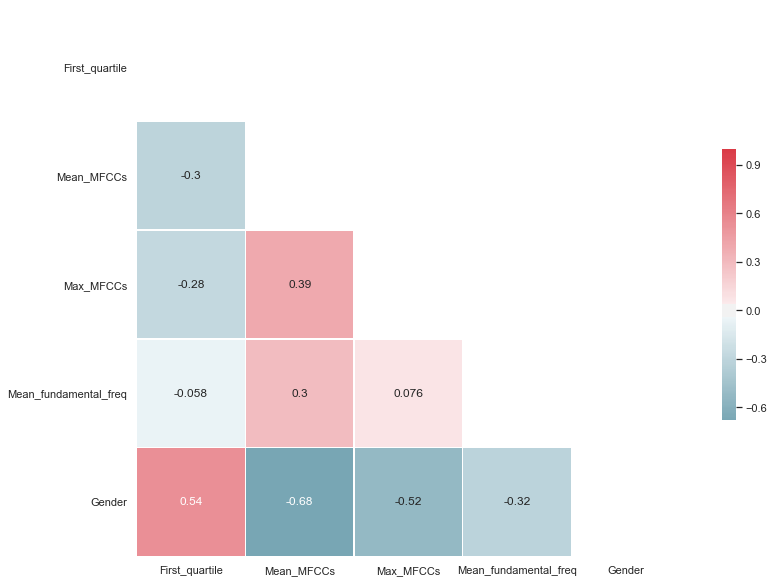

In [12]:
corr_matrix = voices_new[['First_quartile','Mean_MFCCs', 'Max_MFCCs', 'Mean_fundamental_freq', 'Gender']].corr()
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, annot=True, vmax=1, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()